In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt



Bad key "text.kerning_factor" on line 4 in
/Users/jeffshamp/.conda/envs/sps620/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [23]:
df=pd.read_csv('./global_terror_data_proj_1.csv')
df.head()

,iyear,imonth,iday,country_txt,summary,success,attacktype1,attacktype1_txt,target1,targtype1_txt,claimed,gname,weaptype1,weaptype1_txt,nkill
0,1986,2,28,Sweden,2/28/1986: Prime Minister Olof Palme was shot ...,1,2,Armed Assault,Olof Palme,Government (General),1.0,Unknown,5,Firearms,1.0
1,1985,1,0,West Germany (FRG),NaN,0,3,Bombing/Explosion,Headquarters,Military,NaN,Unknown,6,Explosives,0.0
2,1985,1,0,France,NaN,1,9,Unknown,Police Headquarters,Police,NaN,Unknown,13,Unknown,1.0
3,1985,1,0,France,NaN,1,9,Unknown,unknown,Unknown,NaN,Unknown,13,Unknown,0.0
4,1985,1,0,France,NaN,1,9,Unknown,unknown,Unknown,NaN,Unknown,13,Unknown,0.0


In [24]:
indexNames = df[df['gname'] == "Unknown"].index

In [4]:
ter_df = df[["country_txt", 'attacktype1']]
ter_df.head()

,country_txt,attacktype1
0,Sweden,2
1,West Germany (FRG),3
2,France,9
3,France,9
4,France,9


In [6]:
catv = ter_df.filter(["attacktype1"], axis=1)
catv['ID'] = catv.reset_index().index
catv.head()

,attacktype1,ID
0,2,0
1,3,1
2,9,2
3,9,3
4,9,4


In [9]:
G=nx.from_pandas_dataframe(ter_df, 'country_txt', 'attacktype1', create_using=nx.Graph() )
#G.nodes()

In [10]:
catv= catv.set_index('ID')
catv=catv.reindex(G.nodes())
catv.head()

,attacktype1
ID,
Sweden,NaN
2,9.0
West Germany (FRG),NaN
3,9.0
France,NaN


In [11]:
catv['attacktype1']=pd.Categorical(catv['attacktype1'])
catv['attacktype1'].cat.codes

ID
Sweden               -1
2                     1
West Germany (FRG)   -1
3                     1
France               -1
                     ..
Turkmenistan         -1
Serbia-Montenegro    -1
Bhutan               -1
Serbia               -1
South Sudan          -1
Length: 204, dtype: int8

/Users/jeffshamp/.conda/envs/sps620/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/jeffshamp/.conda/envs/sps620/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/jeffshamp/.conda/envs/sps620/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Users/jeffshamp/.conda/envs/sps620/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_

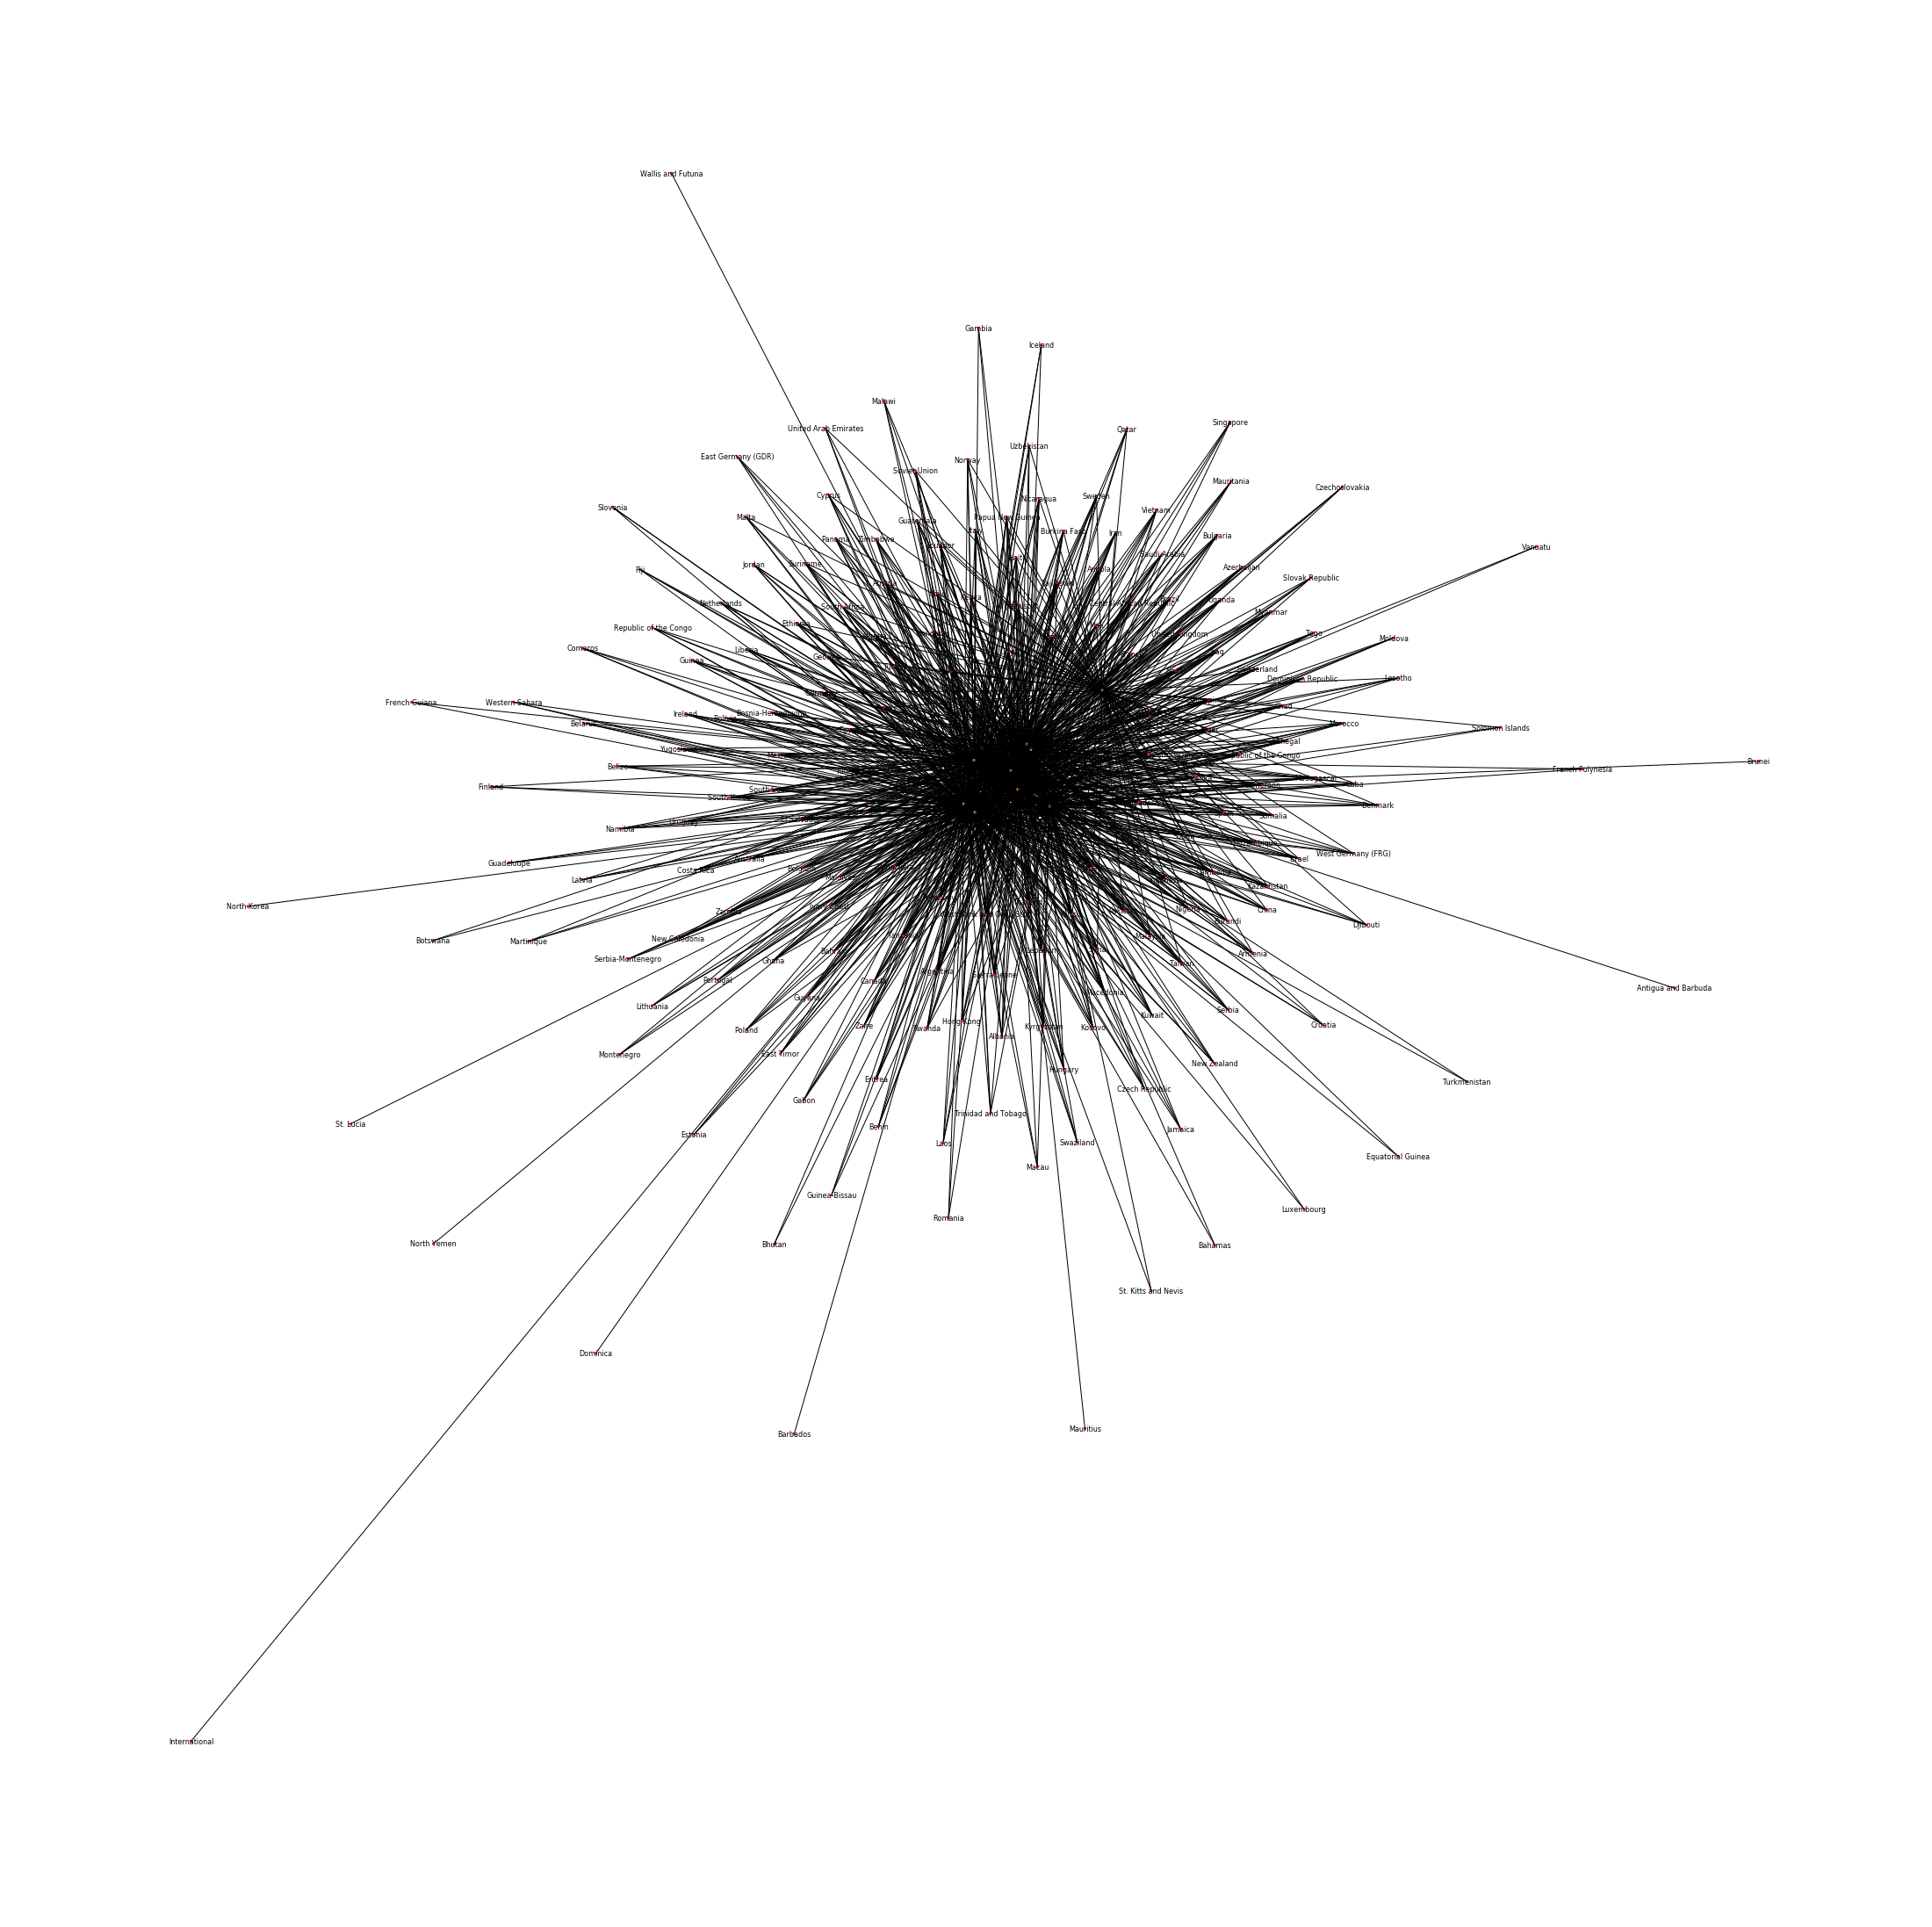

In [13]:
plt.figure(figsize=(30,30))
nx.draw(G, with_labels=True, 
        node_color=catv['attacktype1'].cat.codes, 
        cmap=plt.cm.Set1,
        node_size=5, font_size=8)
plt.show()

In [14]:
ter_df_sub = ter_df[(ter_df.country_txt == "Iraq")|
                    (ter_df.country_txt == "Turkey")|
                    (ter_df.country_txt == "Syria")]
ter_df_sub['ID'] = np.arange(len(ter_df_sub))

/Users/jeffshamp/.conda/envs/sps620/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
ter_df_sub.head(20)

,country_txt,attacktype1,ID
1748,Turkey,1,0
1776,Syria,3,1
2026,Turkey,3,2
4150,Syria,1,3
4156,Syria,3,4
4555,Syria,3,5
4999,Turkey,1,6
5011,Turkey,1,7
5025,Turkey,7,8
5043,Syria,3,9


In [16]:
catv = ter_df_sub.filter(["attacktype1"], axis=1)
catv['ID'] = catv.reset_index().index
catv.head()

,attacktype1,ID
1748,1,0
1776,3,1
2026,3,2
4150,1,3
4156,3,4


In [17]:
G=nx.from_pandas_dataframe(ter_df_sub, 'country_txt', 'attacktype1', create_using=nx.Graph() )
#G.nodes()

In [18]:
catv= catv.set_index('ID')
catv=catv.reindex(G.nodes())

In [19]:
catv['attacktype1']=pd.Categorical(catv['attacktype1'])
catv['attacktype1'].cat.codes

ID
Turkey   -1
1         1
Syria    -1
3         0
7         0
2         1
9         1
6         0
Iraq     -1
5         1
8         2
4         1
dtype: int8

/Users/jeffshamp/.conda/envs/sps620/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/jeffshamp/.conda/envs/sps620/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/jeffshamp/.conda/envs/sps620/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Users/jeffshamp/.conda/envs/sps620/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_

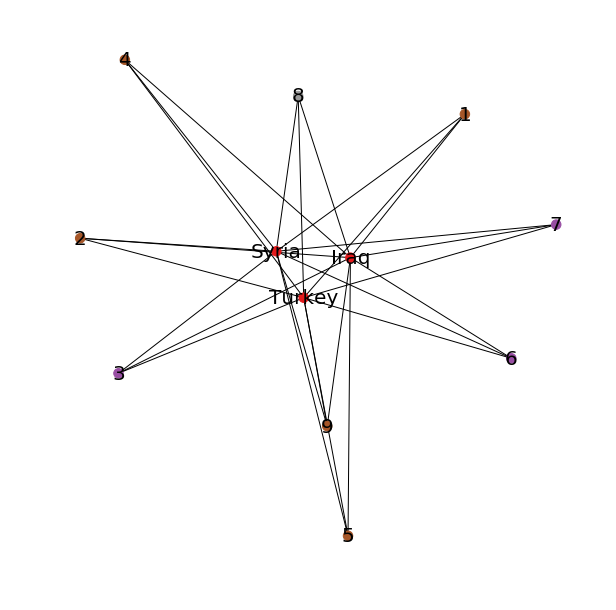

In [20]:
plt.figure(figsize=(8,8))
nx.draw(G, with_labels=True, node_color=catv['attacktype1'].cat.codes, cmap=plt.cm.Set1, node_size=90, font_size=20)
plt.show()